In [1]:
import pandas as pd, pickle, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib as mpl
import matplotlib.lines as mlines
from datetime import datetime, timedelta

# Visual Analysis of the Coronavirus Pandemic (State and County Level)
* CDC cases and death information
* Safegraph county census data
* Google mobility data

## Update Data and Import Graphing Functions

In [2]:
#%run safegraph_census.ipynb

In [3]:
%run create_master_table.ipynb

--------------------
Census Data
--------------------
Enigma Aggregation
Shape:  (583062, 10)
Case control total:  602329120.0
Death control total:  22406363.0
Dataframe Shape:  (583062, 14)
Number of States:  55
Number of Counties:  3211
Minimum Date:  2020-01-21 00:00:00
Maximum Date:  2020-09-29 00:00:00
Duplicate State-Fips-Date:  0
Null State Code:  0
Null County Code:  0
Null Dates:  0
Case Control Total:  602329120.0
Death Control Total:  22406363.0
--------------------
Enigma Johns Hopkins
Shape:  (419379, 14)
Case control total:  62110114.0
Death control total:  3522063.0
Dataframe Shape:  (419379, 18)
Number of States:  51
Number of Counties:  3201
Minimum Date:  2020-01-22 00:00:00
Maximum Date:  2020-05-29 00:00:00
Duplicate State-Fips-Date:  0
Null State Code:  0
Null County Code:  0
Null Dates:  0
Case Control Total:  62110114.0
Death Control Total:  3522063.0
--------------------
Enigma New York Times
Shape:  (129747, 6)
Case control total:  31616769.0
Death control tota

In [4]:
with open('covid_data.p', 'rb') as f:
    data = pickle.load(f)

In [5]:
%run graphFunctions.ipynb

In [6]:
# Remove this next run, it is only to correct for no data uploads on the most recent days if report is generated over weekend
#data = data[data.date!='2021-04-02']

In [7]:
print("Total Deaths :", data[data.date == data.date.max()- timedelta(days=1)].deaths_cdc.sum())

Total Deaths : 583029.0


## Section 1: Statewide Totals

### Figure 1.1: Deaths by State

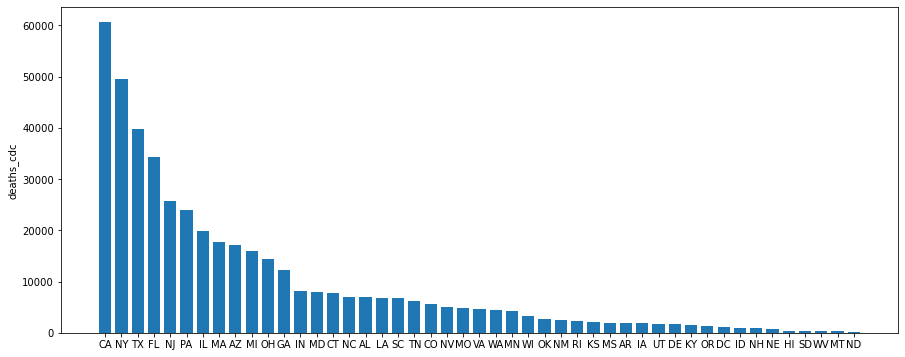

In [8]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc', 200)

### Figure 1.2: Deaths per 100,000 People

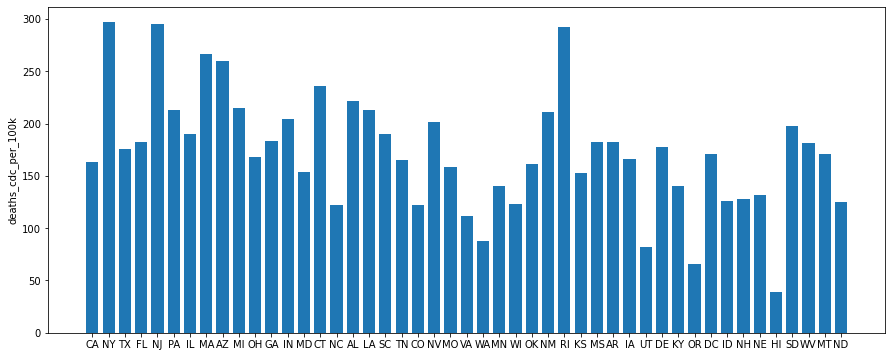

In [9]:
plotStateTotals(data, 'deaths_cdc', 'deaths_cdc_per_100k', 200)

### Figure 1.3: Cases and Deaths (Total, Per 100k People) - All States

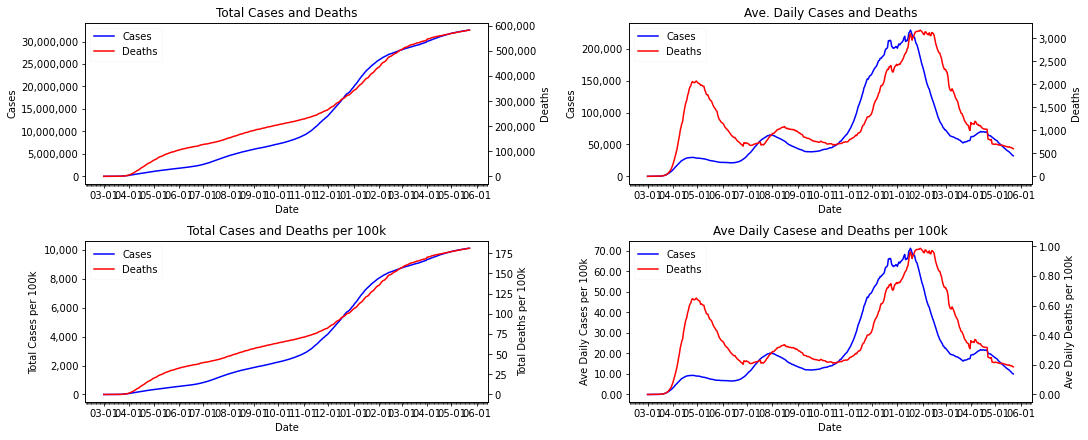

In [10]:
states=data.state_code.unique()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.4: Cases and Deaths (Total, Per 100k People) - Northeast

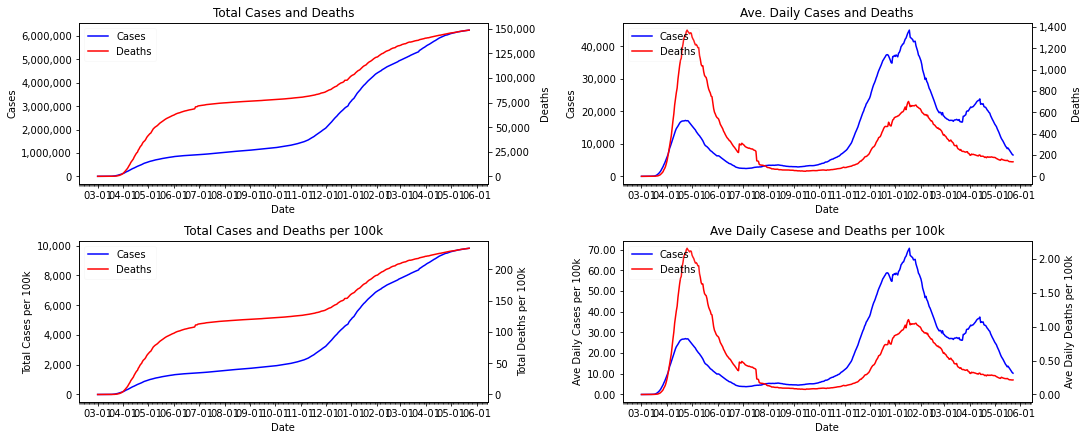

In [11]:
states = getStatesInRegion("N").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.5: Cases and Deaths (Total, Per 100k People) - South

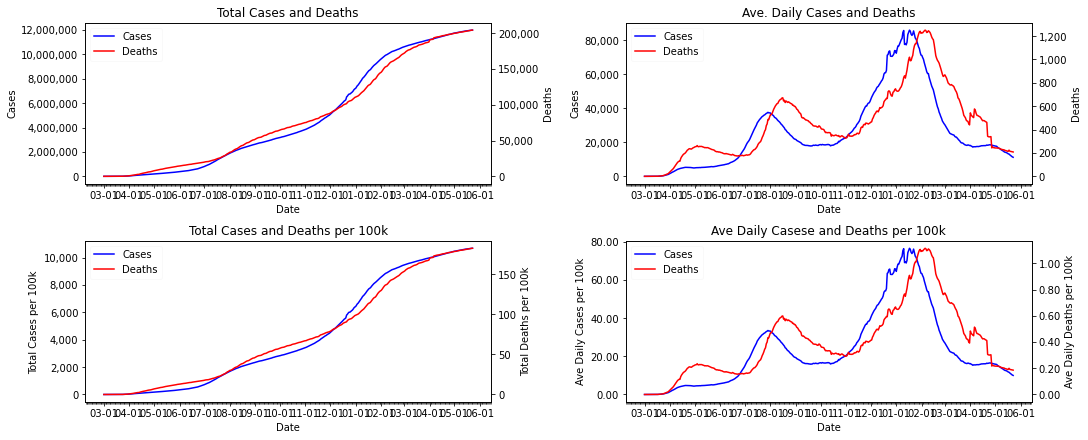

In [12]:
states = getStatesInRegion("S").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.6: Cases and Deaths (Total, Per 100k People) - Midwest

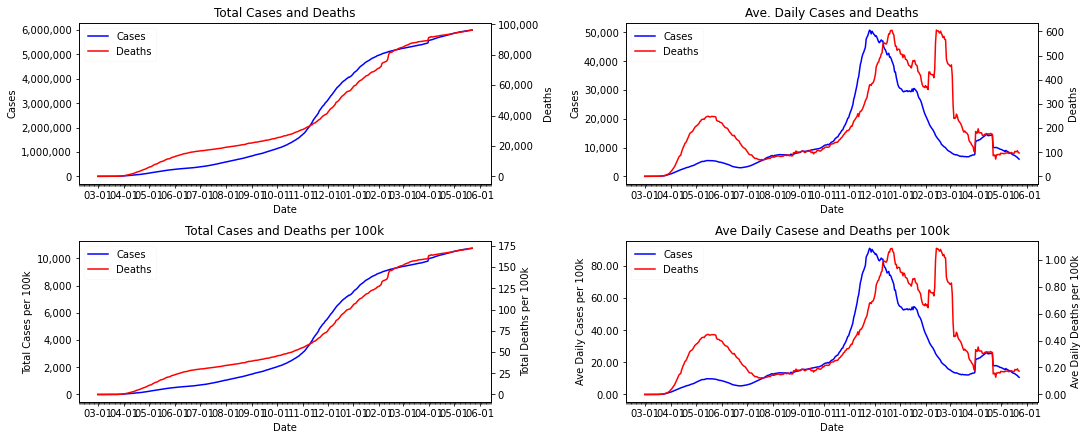

In [13]:
states = getStatesInRegion("M").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

### Figure 1.7: Cases and Deaths (Total, Per 100k People) - West

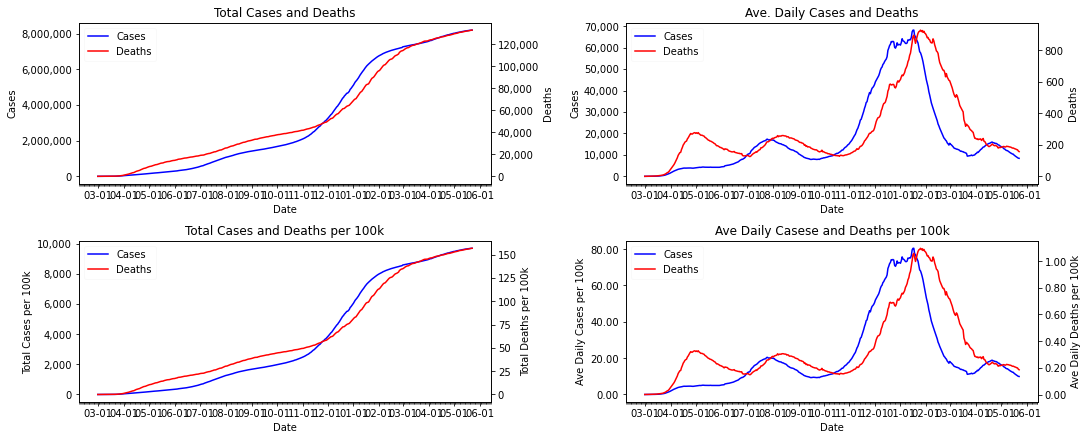

In [14]:
states = getStatesInRegion("W").keys()
stateGraphs(data, states,'confirmed_cdc','deaths_cdc', '2020-03-01', 21)

## Section 2: State Caparison by Region (Northeast, South, Midwest, West, Other)

### Figure 2.1:  Deaths - 14 Day Average - Northeast

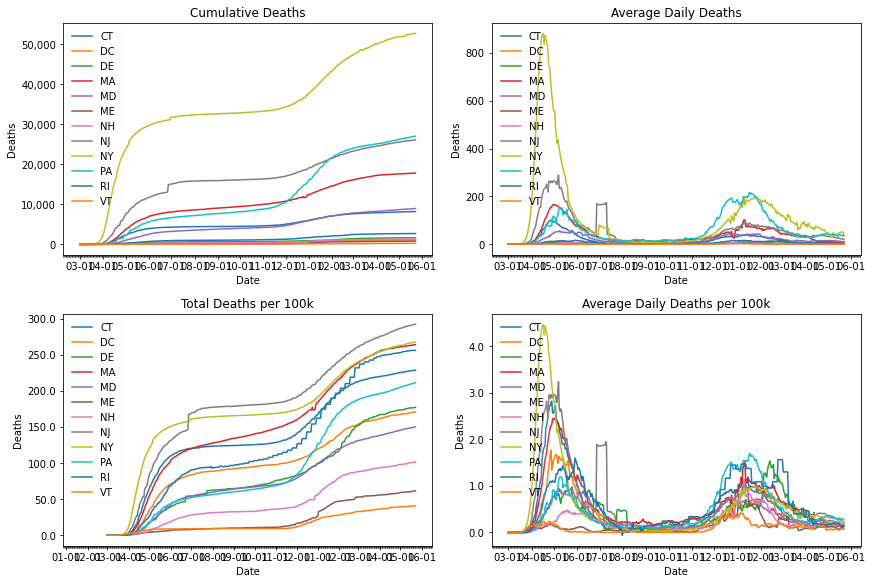

In [15]:
states = getStatesInRegion("N").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

### Figure 2.2:  Deaths - 14 Day Average - South

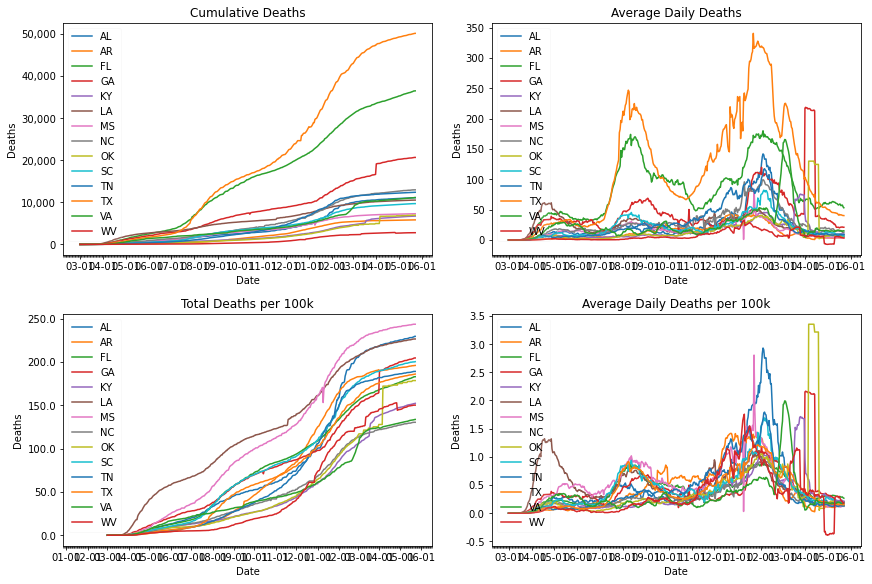

In [16]:
states = getStatesInRegion("S").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

### Figure 2.3:  Deaths - 14 Day Average - Midwest

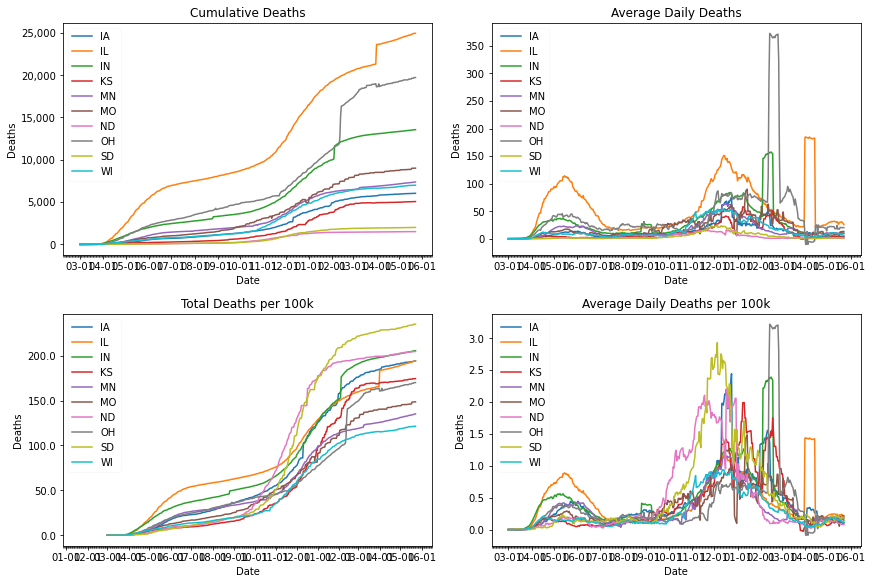

In [17]:
states = getStatesInRegion("M").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

### Figure 2.4:  Deaths - 14 Day Average - West

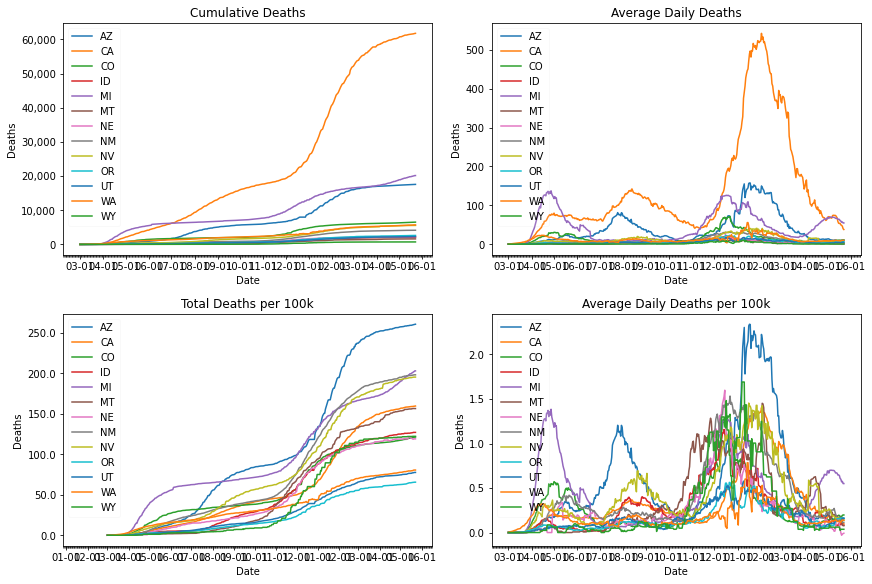

In [18]:
states = getStatesInRegion("W").keys()
statesCompare(data, states, 'confirmed_cdc', 'deaths_cdc', '2020-03-01', 14)

## Section 3: County Attribute Analysis Across All States

* Available fields: pir_grp, unins_grp, pop_density_grp, e_grp, r_b_grp, r_w_grp, age_55_plus_grp

In [19]:
states = list(data.state_code.unique())

### Figure 3.1: Population Density

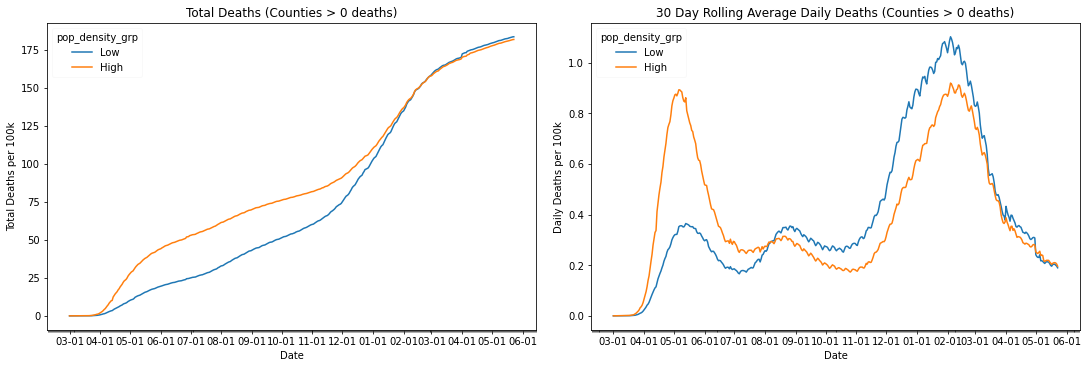

In [20]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pop_density_grp', start_date='2020-03-01')

### Figure 3.2: Race

The race definition used here is 'white' as reported in census data.  Low would be 'non-white' and high would be 'white'.

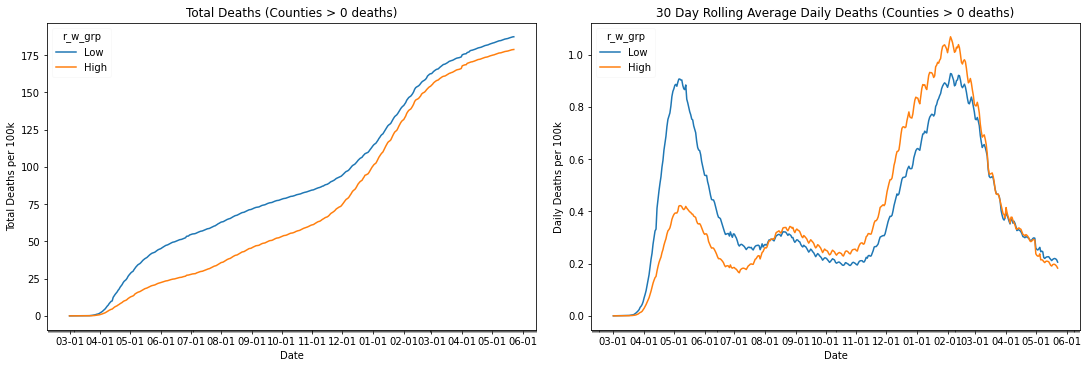

In [21]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='r_w_grp', start_date='2020-03-01')

### Figure 3.2: Uninsured

'Low' are the counties with the lowest percentages of uninsured individuals.

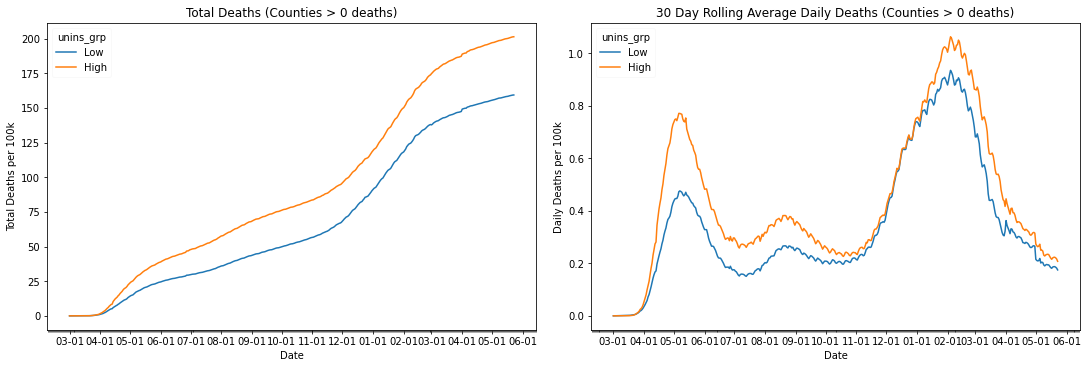

In [22]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='unins_grp', start_date='2020-03-01')

### Figure 3.3: Poverty Income Ratio

'High' are the counties with the highest percentage of PIR > 200%

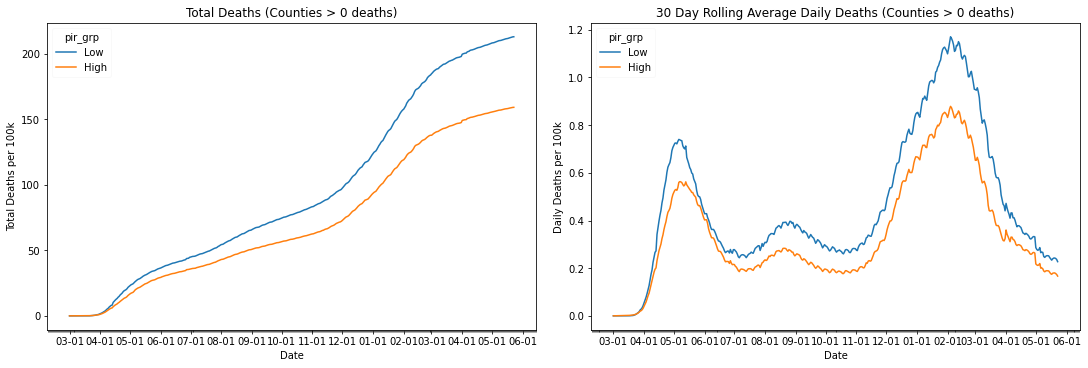

In [23]:
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='pir_grp', start_date='2020-03-01')

### Figure 3.4: 2020 Election Outcome

'High' is 'Republican' and 'Low' is 'Democrat' vote in 2020 presidential election.

#### Figure 3.4.1: 2020 Election Outcome - All States

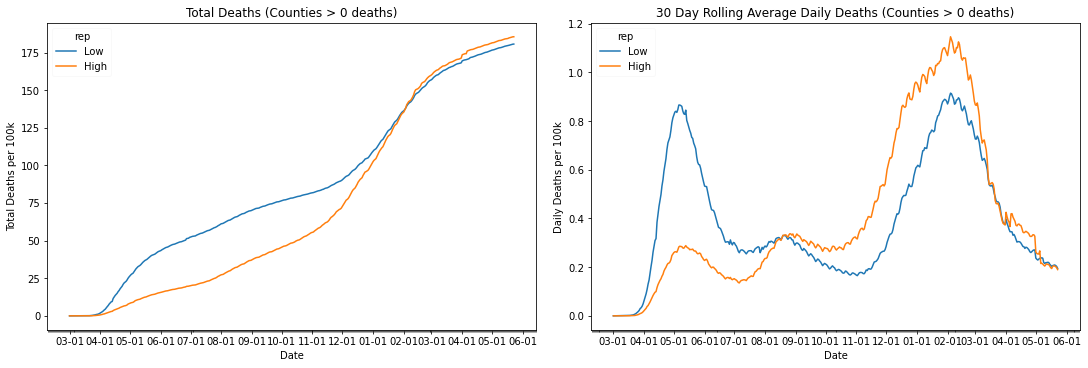

In [24]:
states=data.state_code.unique()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.2: 2020 Election Outcome - Northeast

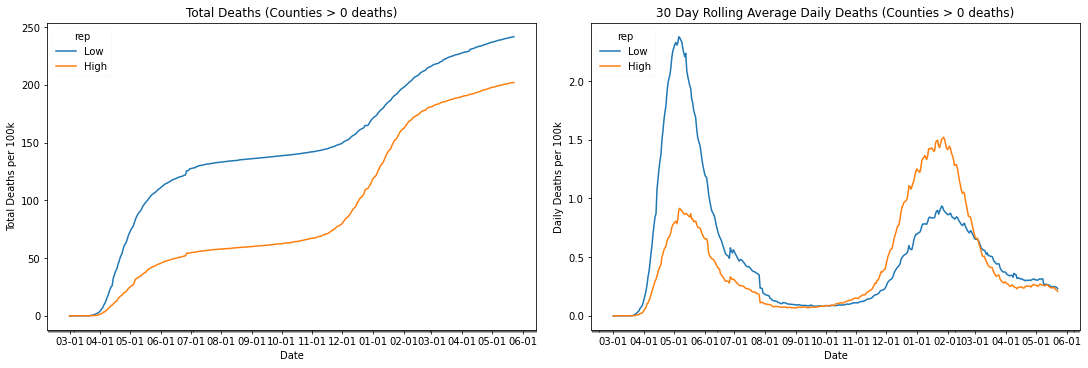

In [25]:
states = getStatesInRegion("N").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.3: 2020 Election Outcome - Southeast

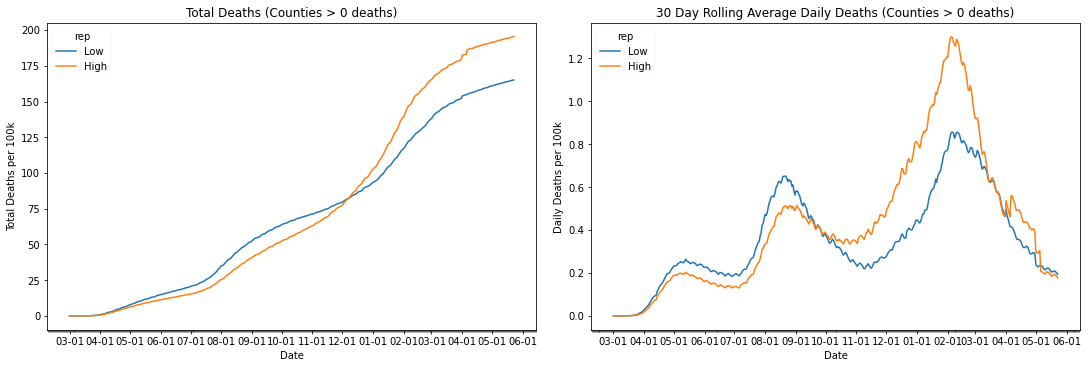

In [26]:
states = getStatesInRegion("S").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.4: 2020 Election Outcome - Midwest

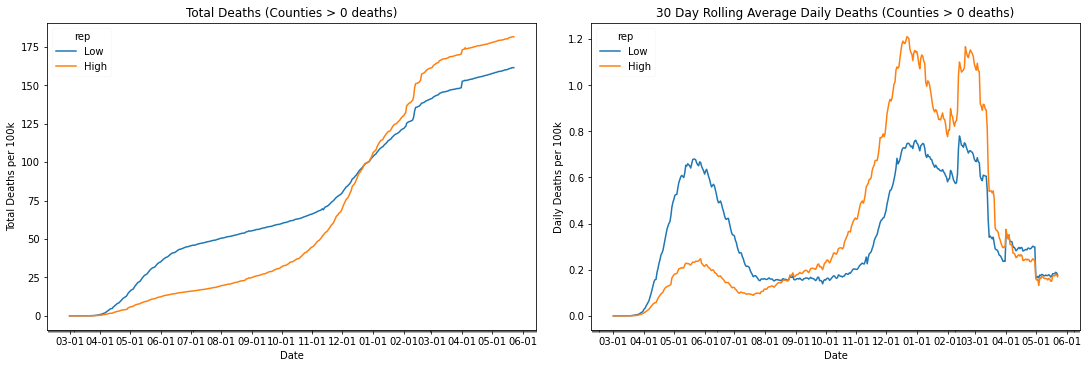

In [27]:
states = getStatesInRegion("M").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

#### Figure 3.4.5: 2020 Election Outcome - West

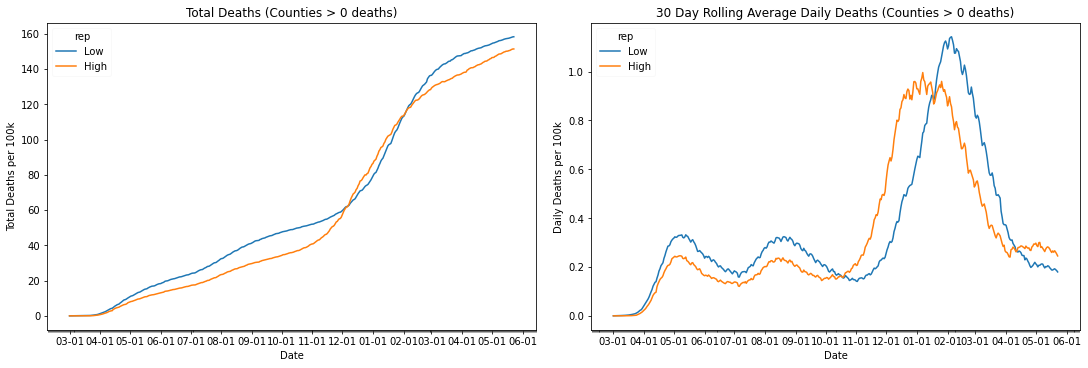

In [28]:
states = getStatesInRegion("W").keys()
plotGroupedDeathCurves(data, states=states, rolling_ave=30, bycol='rep', start_date='2020-03-01')

### Section 4: Deep Dive on States with Top 10 Death Count

#### Section 4.1: New York

In [29]:
state = 'NY'
death_min = 500

##### Figure 4.1.1: Cases and Deaths (Total, Per 100k People)

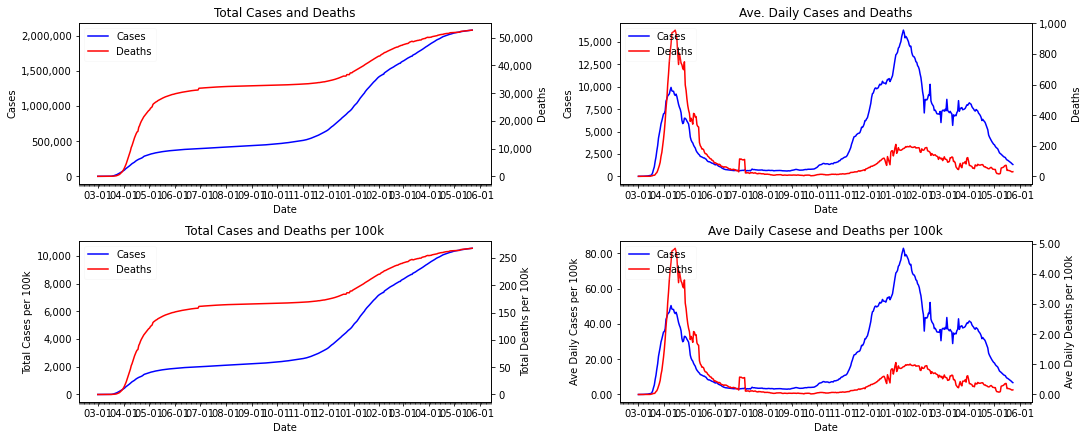

In [30]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.1.2: Deaths per 100k People - 14 Day Average

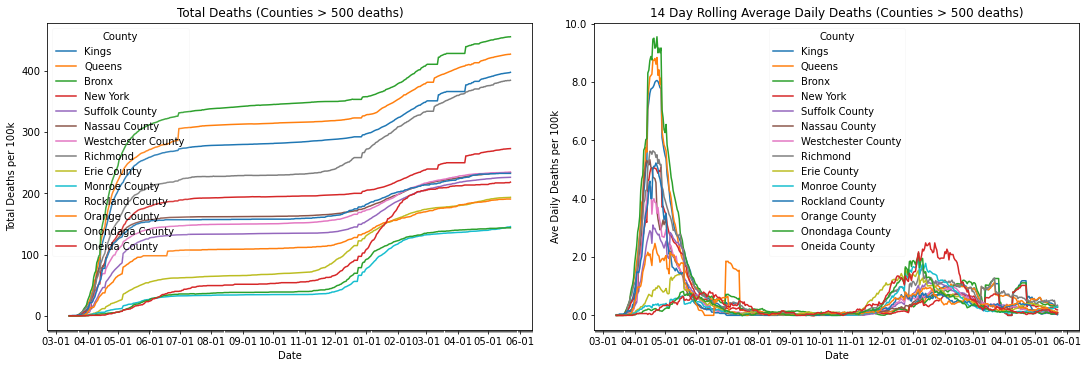

In [31]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.1.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

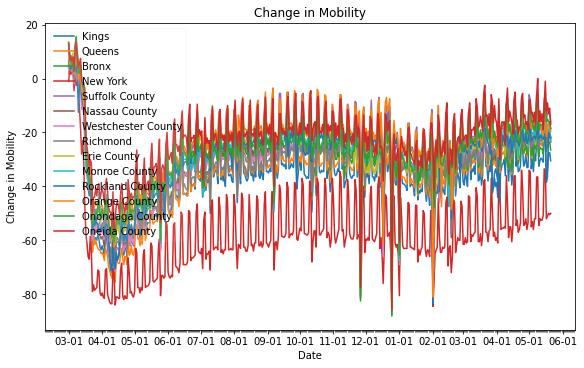

In [32]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

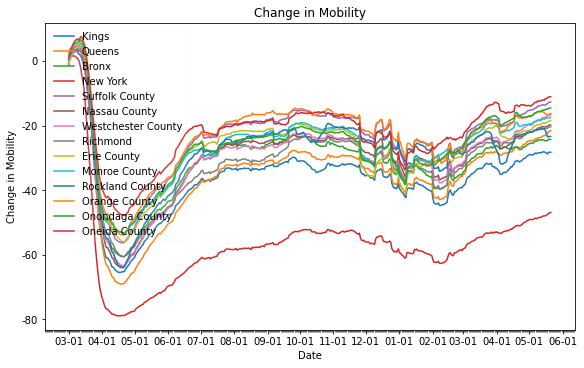

In [33]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.2: California

In [34]:
state = 'CA'
death_min = 600

##### Figure 4.2.1: Cases and Deaths (Total, Per 100k People)

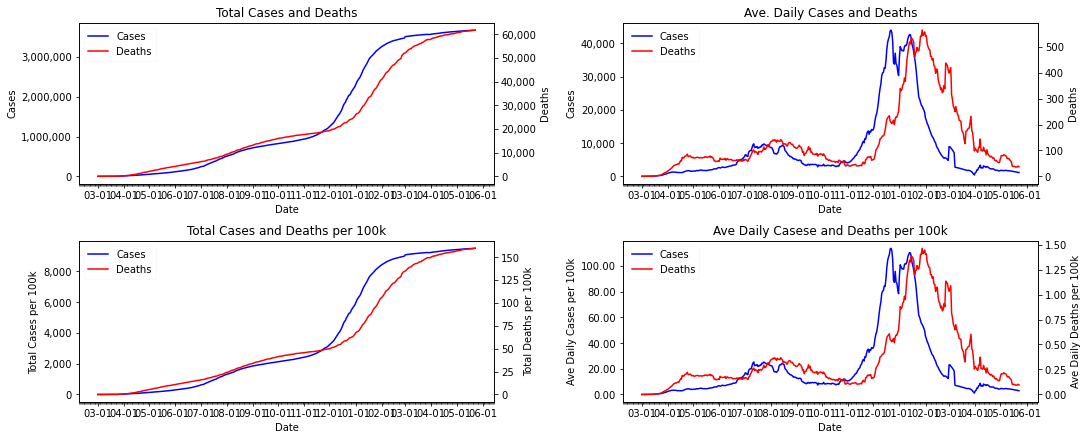

In [35]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.2.2: Deaths per 100k People - 14 Day Average

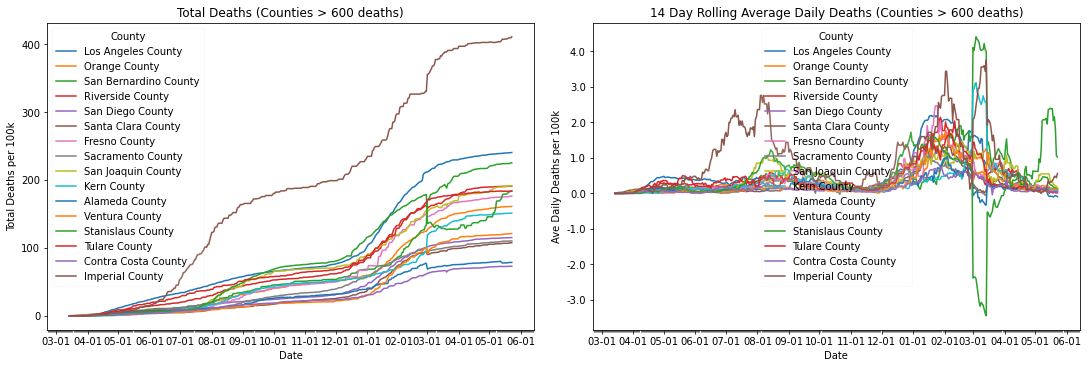

In [36]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.2.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

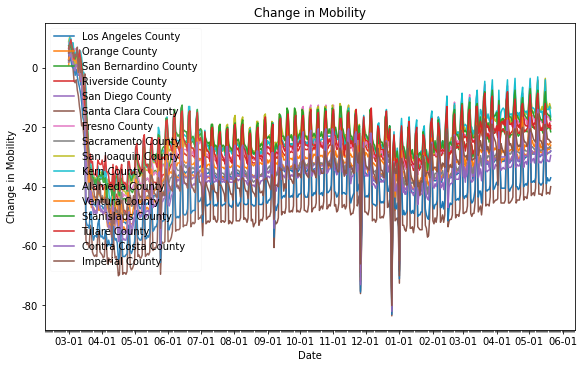

In [37]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

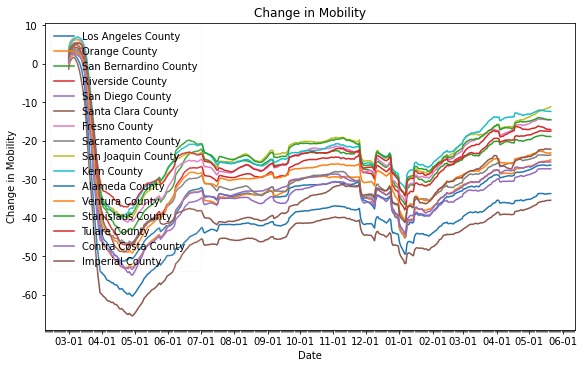

In [38]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.3: Texas

In [39]:
state = 'TX'
death_min = 500

##### Figure 4.3.1: Cases and Deaths (Total, Per 100k People)

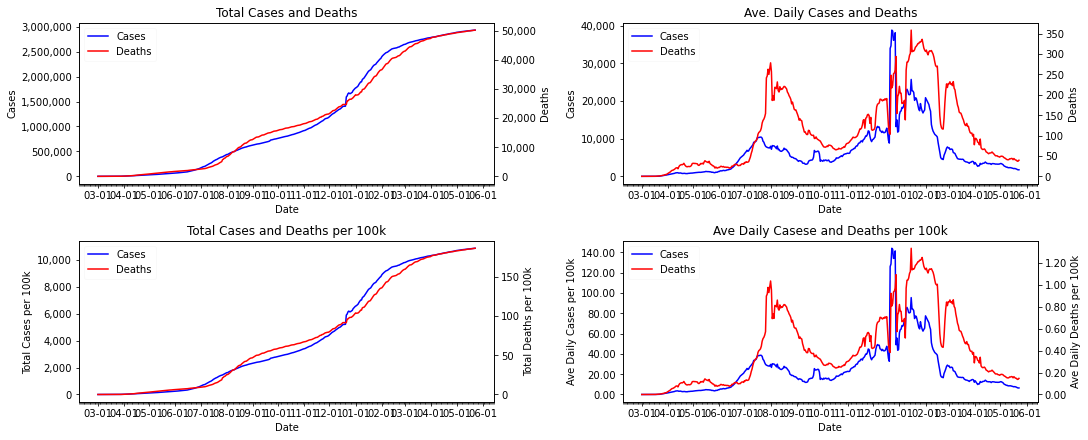

In [40]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.3.2: Deaths per 100k People - 14 Day Average

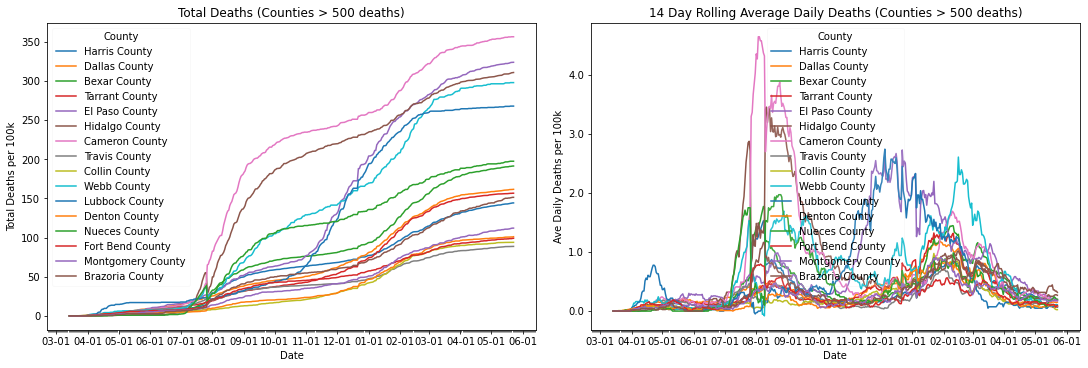

In [41]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.3.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

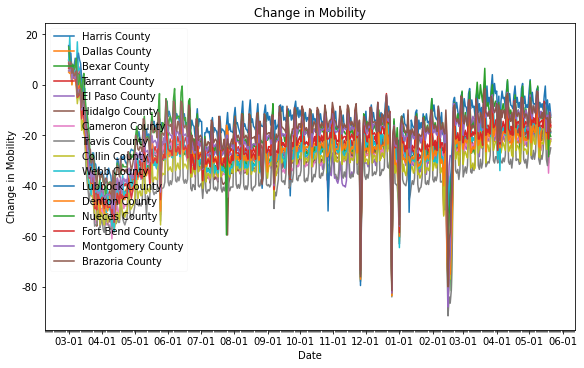

In [42]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

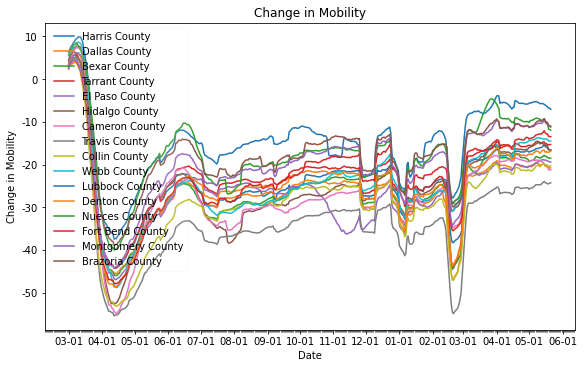

In [43]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.4: Florida

In [44]:
state = 'FL'
death_min = 500

##### Figure 4.4.1: Cases and Deaths (Total, Per 100k People)

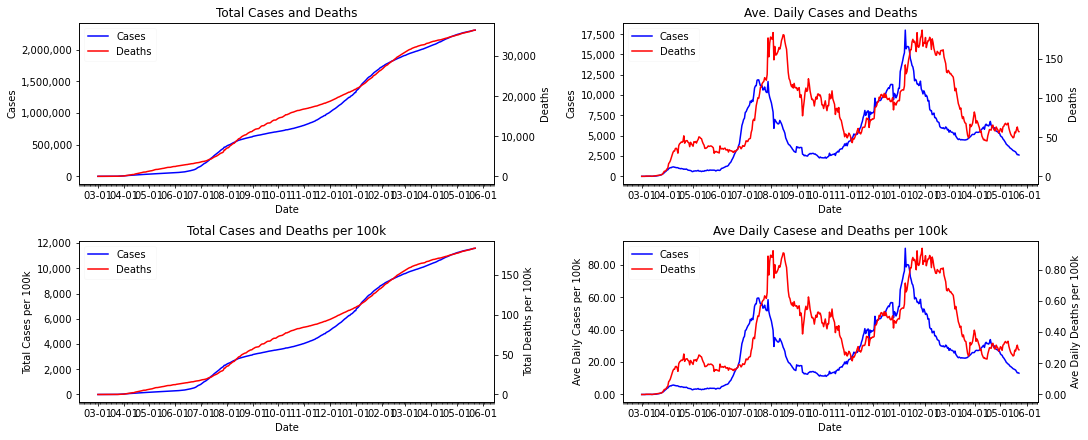

In [45]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.4.2: Deaths per 100k People - 14 Day Average

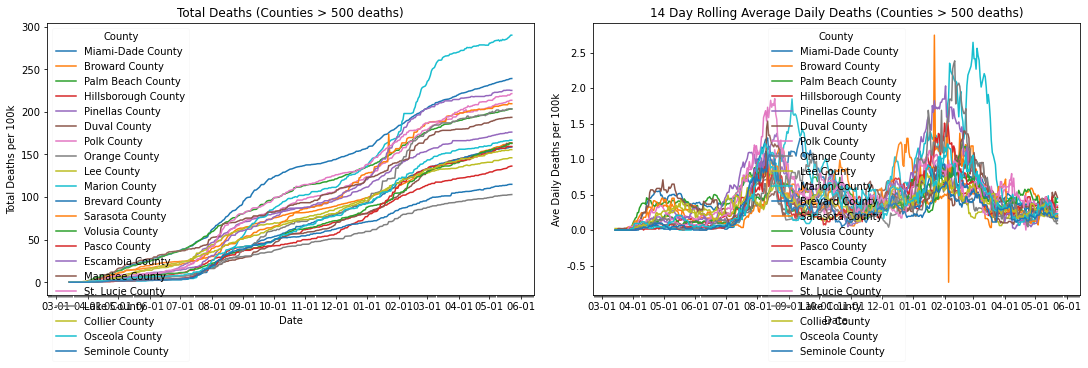

In [46]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.4.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

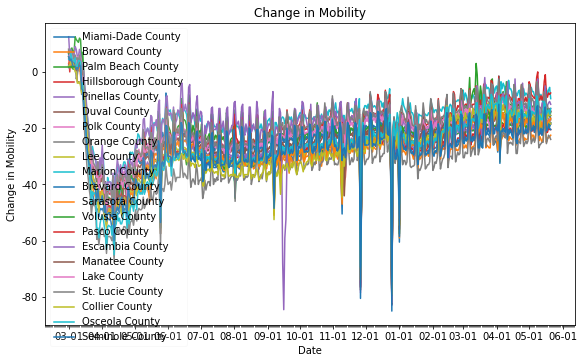

In [47]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

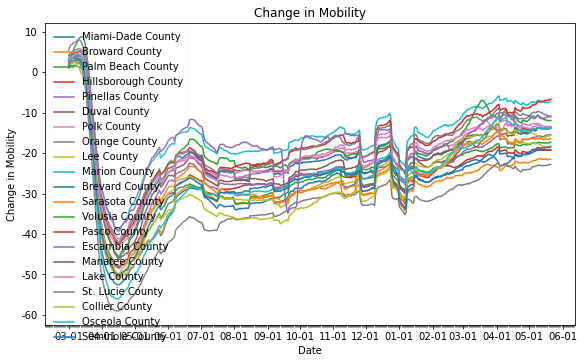

In [48]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.5: New Jersey

In [49]:
state = 'NJ'
death_min = 500

##### Figure 4.5.1: Cases and Deaths (Total, Per 100k People)

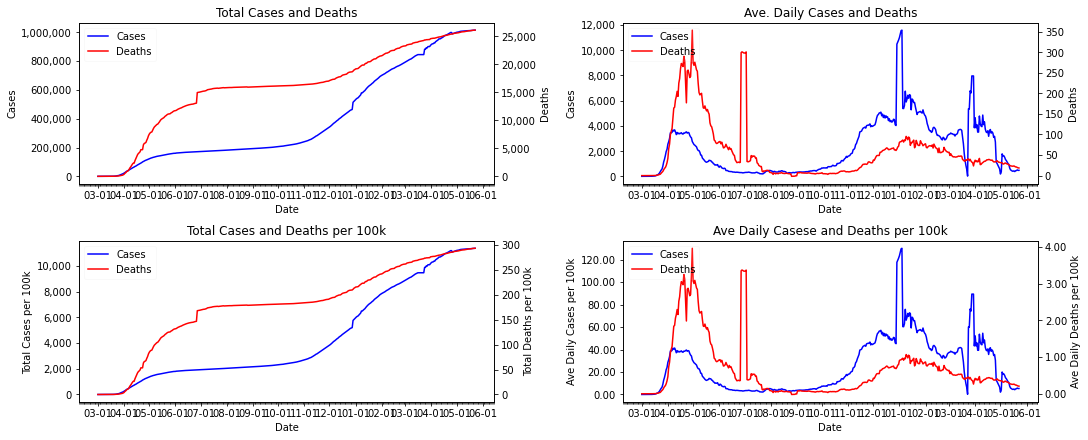

In [50]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.5.2: Deaths per 100k People - 14 Day Average

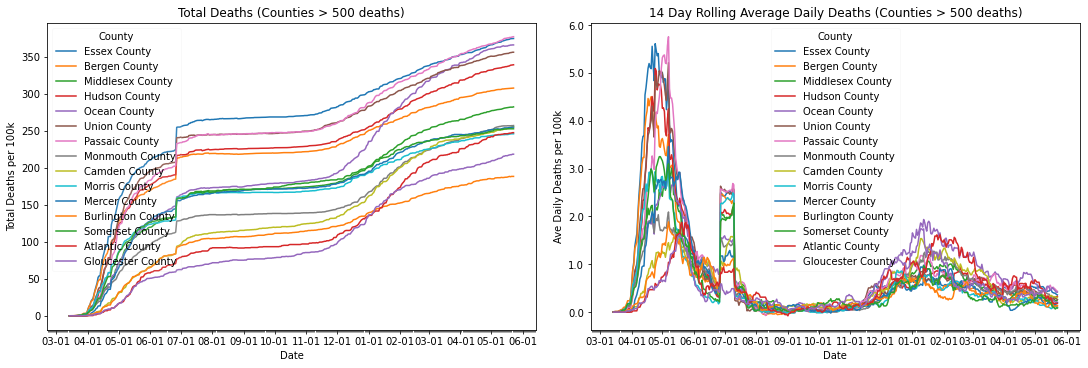

In [51]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.5.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

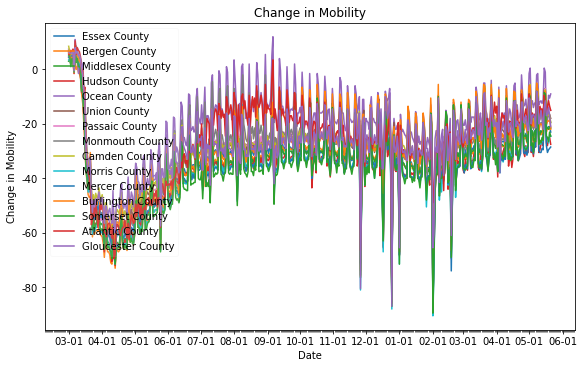

In [52]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

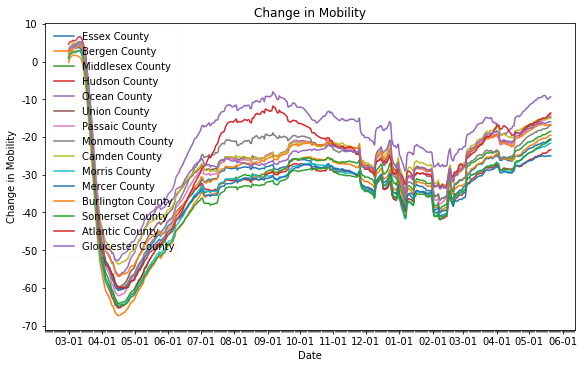

In [53]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.6: Pennsylvania

In [54]:
state = 'PA'
death_min = 500

##### Figure 4.6.1: Cases and Deaths (Total, Per 100k People)

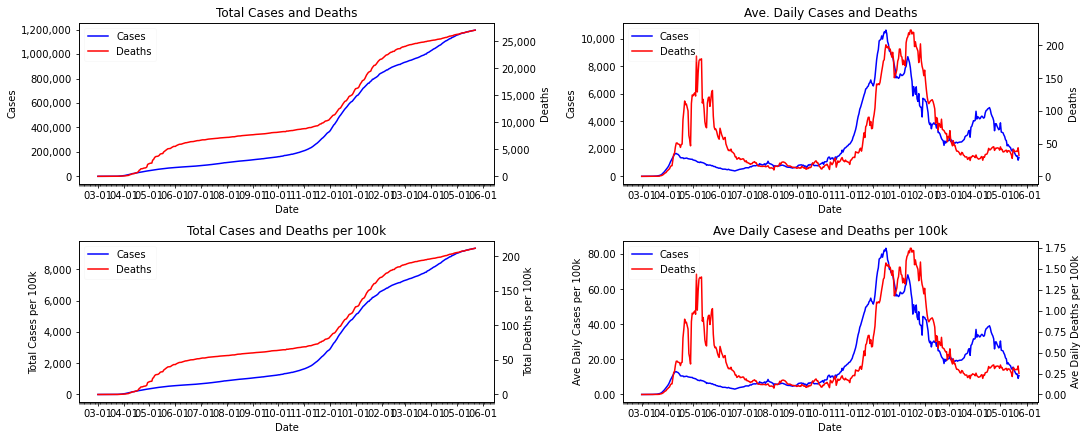

In [55]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.6.2: Deaths per 100k People - 14 Day Average

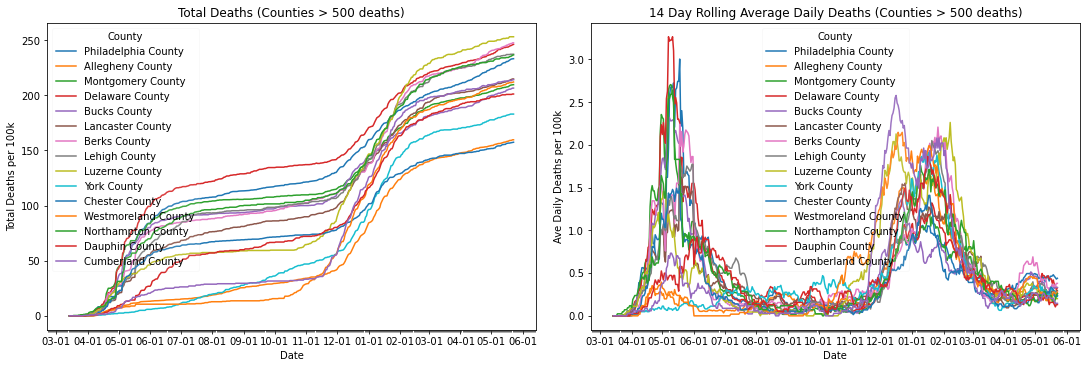

In [56]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.6.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

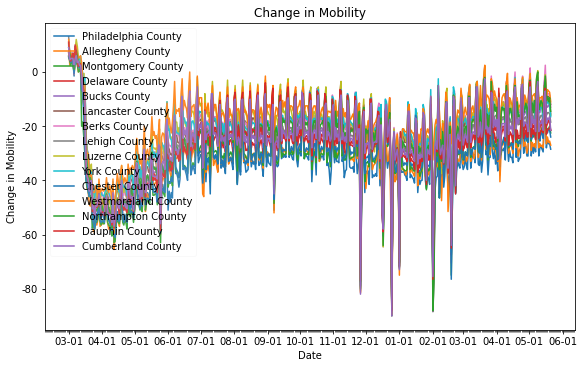

In [57]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

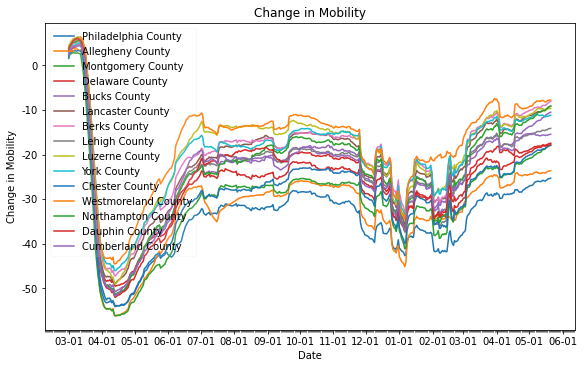

In [58]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.7: Illinois

In [59]:
state = 'IL'
death_min = 300

##### Figure 4.7.1: Cases and Deaths (Total, Per 100k People)

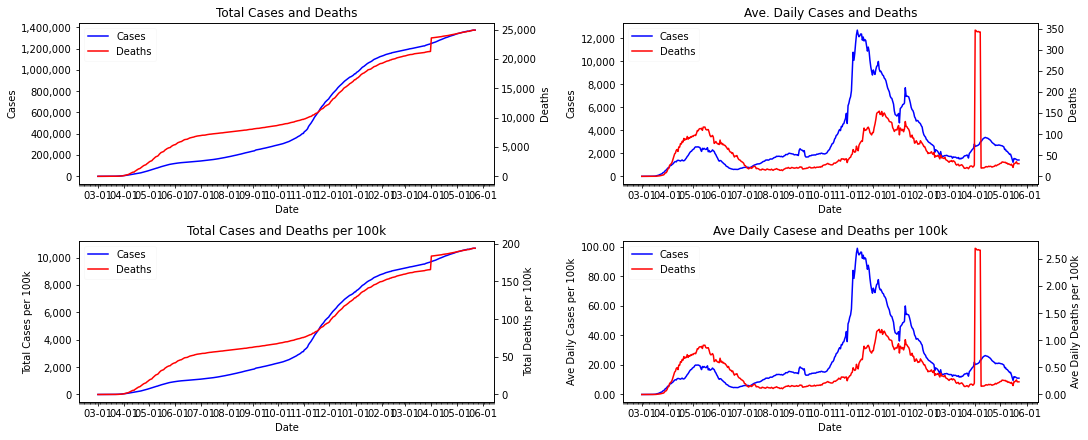

In [60]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.7.2: Deaths per 100k People - 14 Day Average

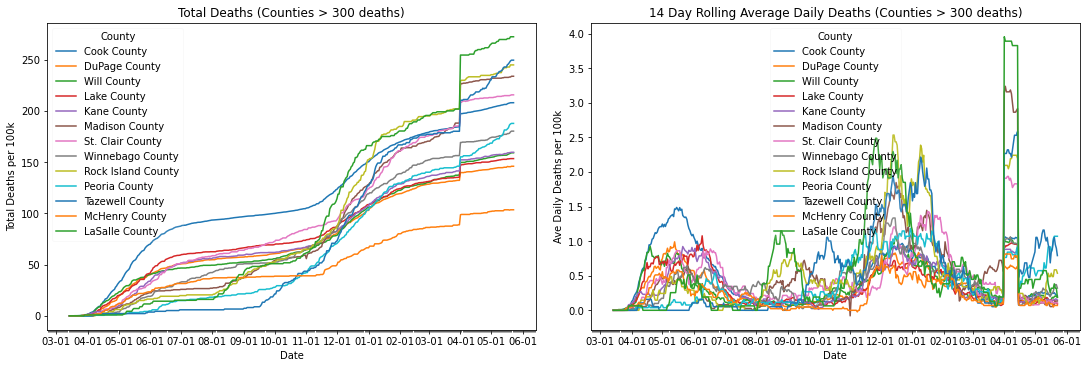

In [61]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.7.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

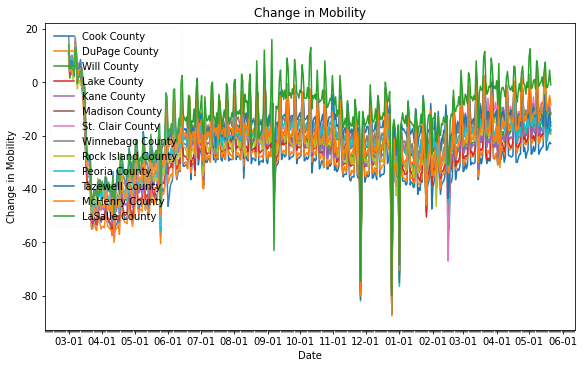

In [62]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

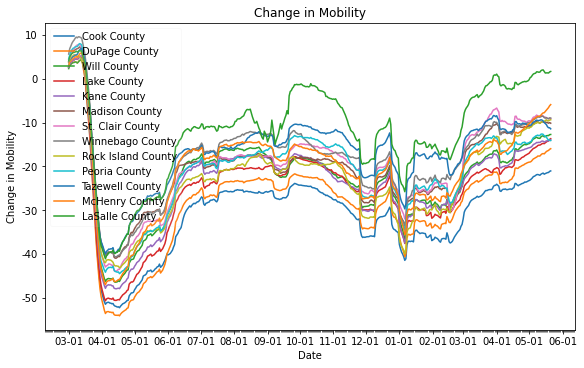

In [63]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.8: Massachusetts

In [64]:
state = 'MA'
death_min = 300

##### Figure 4.8.1: Cases and Deaths (Total, Per 100k People)

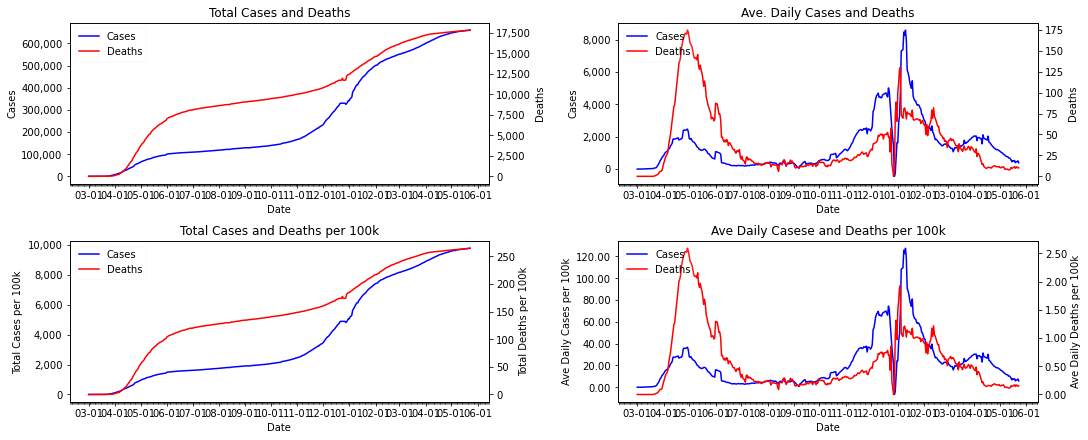

In [65]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.8.2: Deaths per 100k People - 14 Day Average

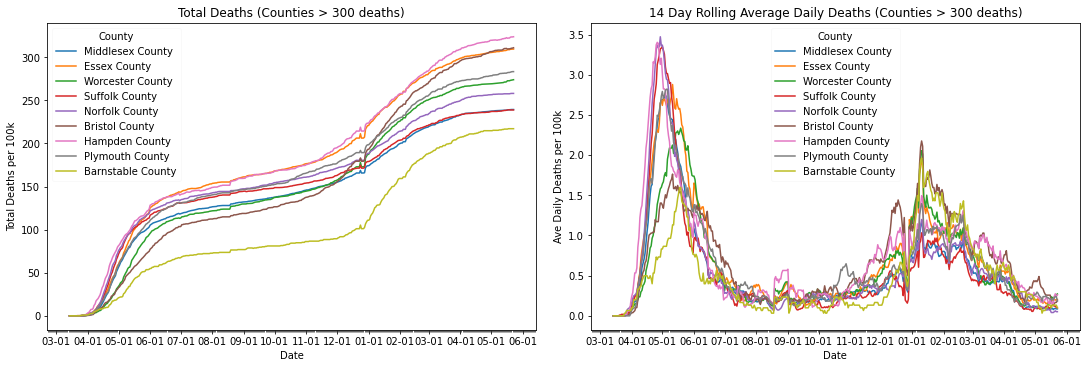

In [66]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.8.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

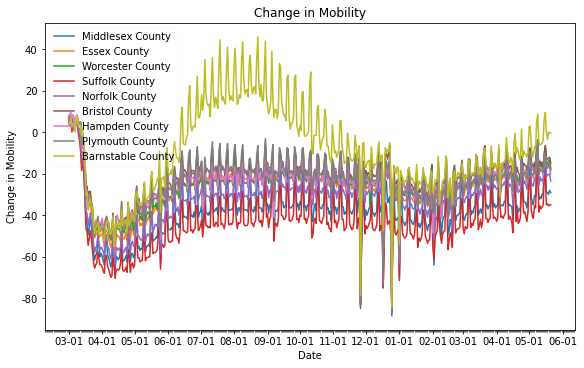

In [67]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

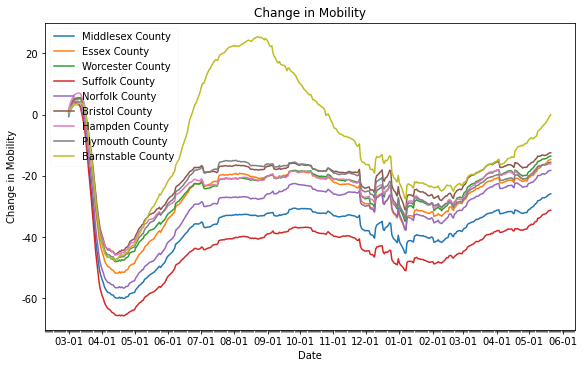

In [68]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.9: Arizona

In [69]:
state = 'AZ'
death_min = 300

##### Figure 4.9.1: Cases and Deaths (Total, Per 100k People)

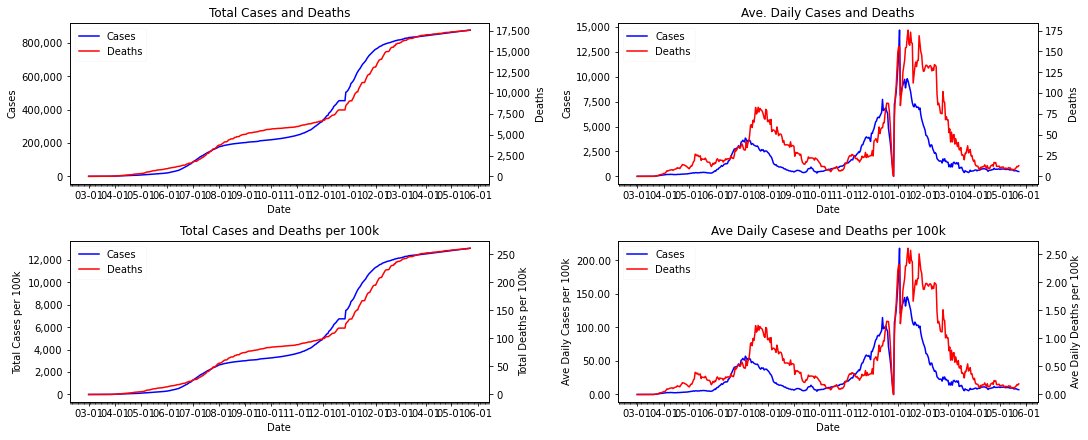

In [70]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.9.2: Deaths per 100k People - 14 Day Average

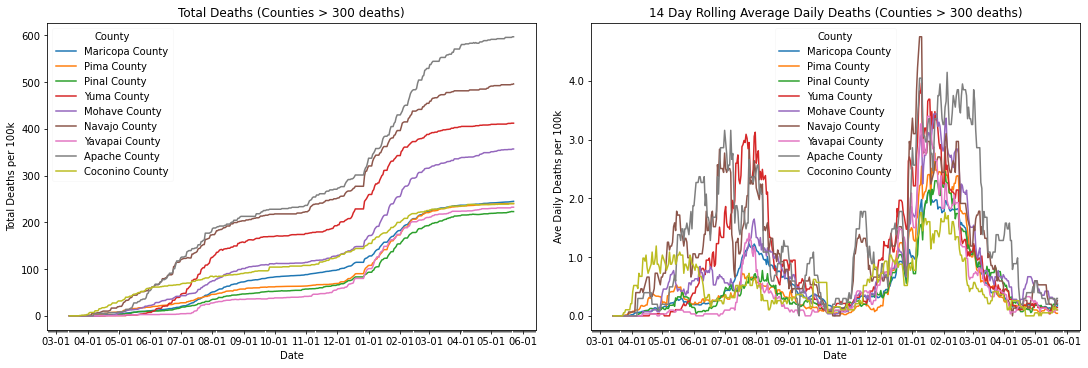

In [71]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.9.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

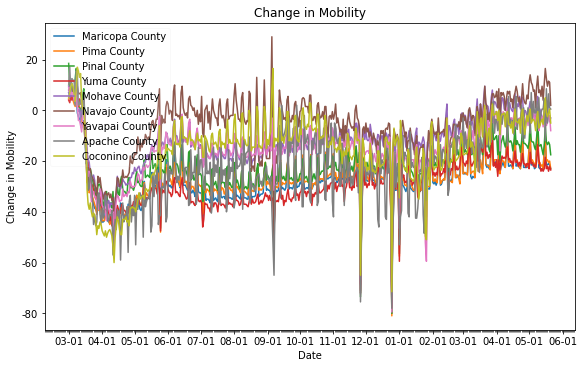

In [72]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

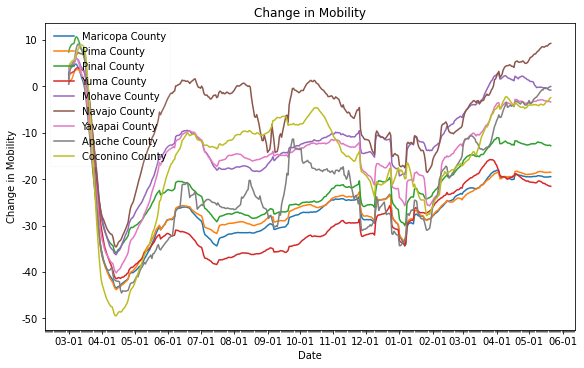

In [73]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.10: Michigan

In [74]:
state = 'MI'
death_min = 300

##### Figure 4.10.1: Cases and Deaths (Total, Per 100k People)

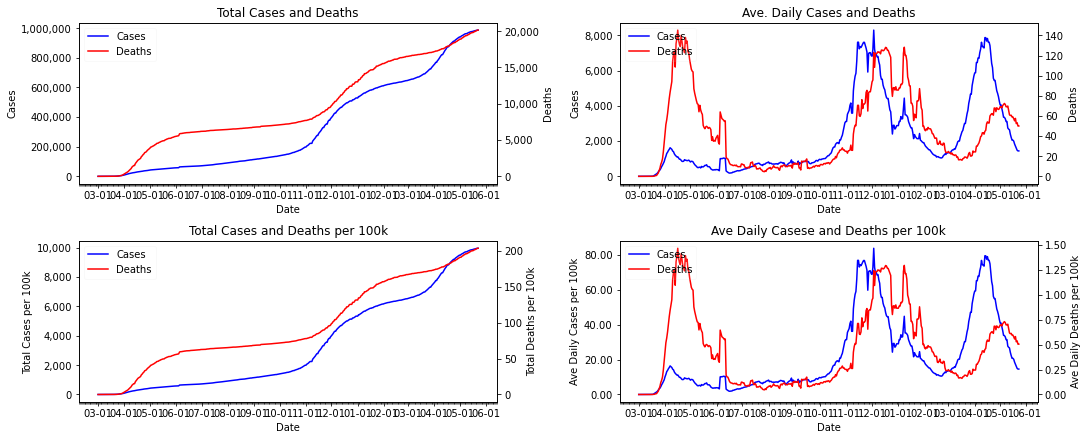

In [75]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.10.2: Deaths per 100k People - 14 Day Average

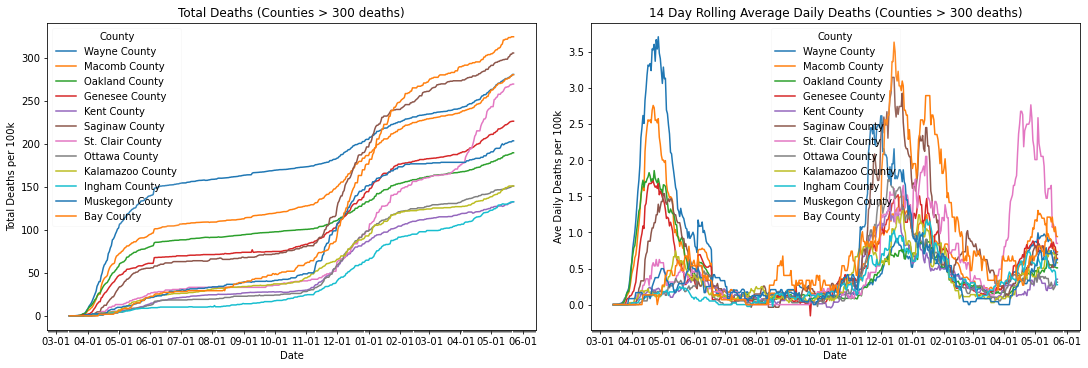

In [76]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.10.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

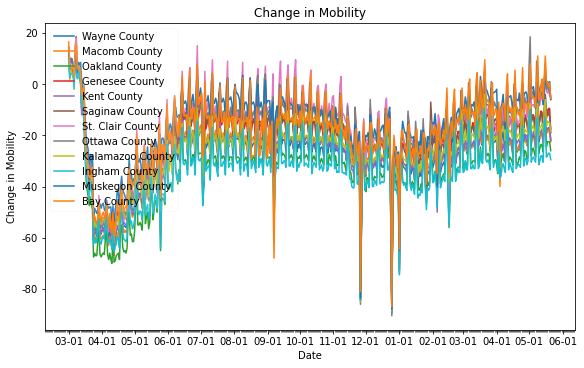

In [77]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

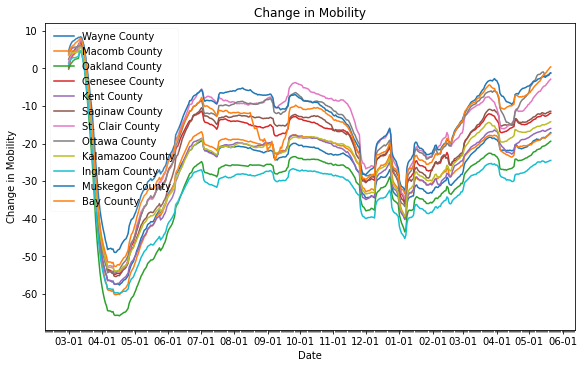

In [78]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.11: Ohio

In [79]:
state = 'OH'
death_min = 300

##### Figure 4.11.1: Cases and Deaths (Total, Per 100k People)

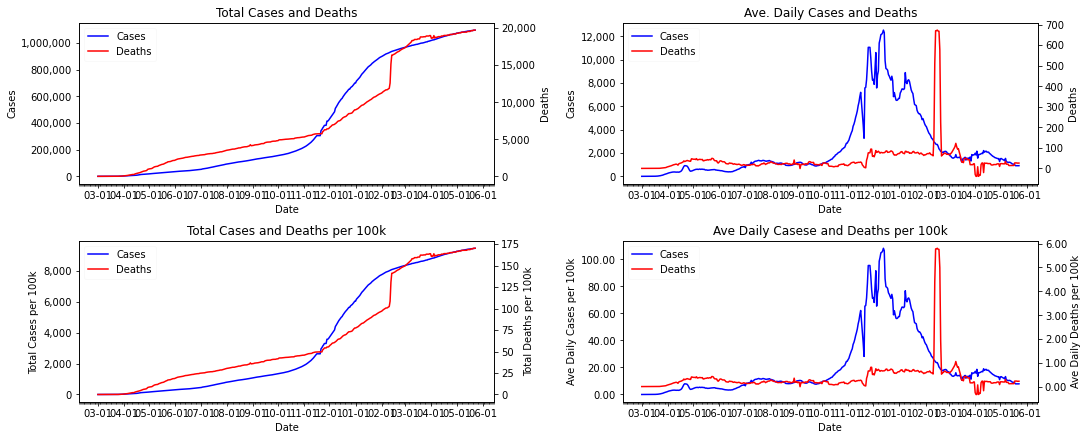

In [80]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.11.2: Deaths per 100k People - 14 Day Average

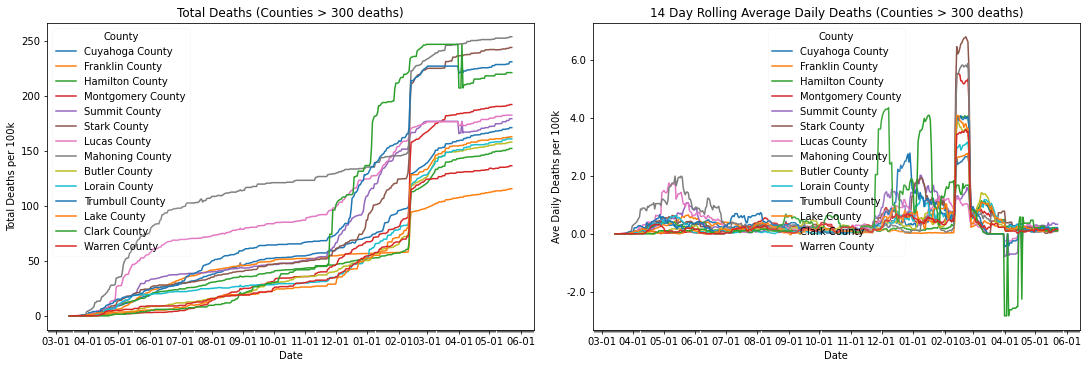

In [81]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.11.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

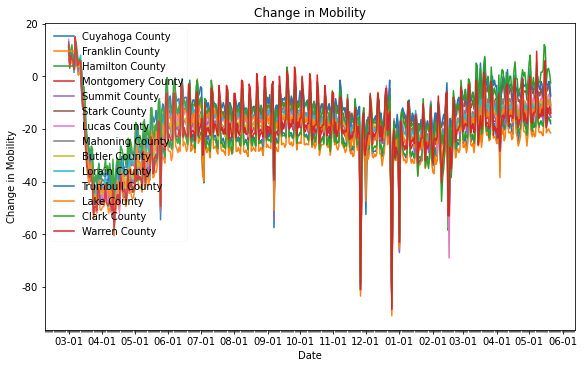

In [82]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

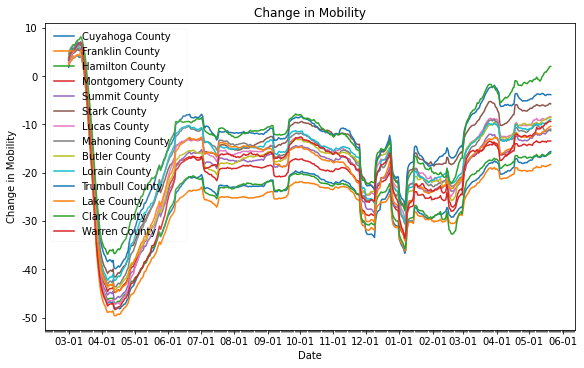

In [83]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)

#### Section 4.12: Indiana

In [84]:
state = 'IN'
death_min = 300

##### Figure 4.12.1: Cases and Deaths (Total, Per 100k People)

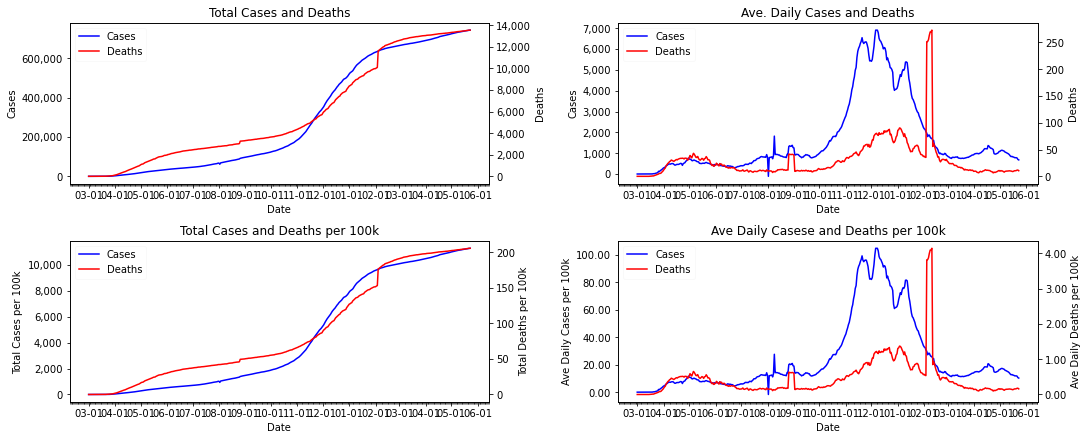

In [85]:
stateGraphs(data, [state],'confirmed_cdc','deaths_cdc', '2020-03-01', 7)

##### Figure 4.12.2: Deaths per 100k People - 14 Day Average

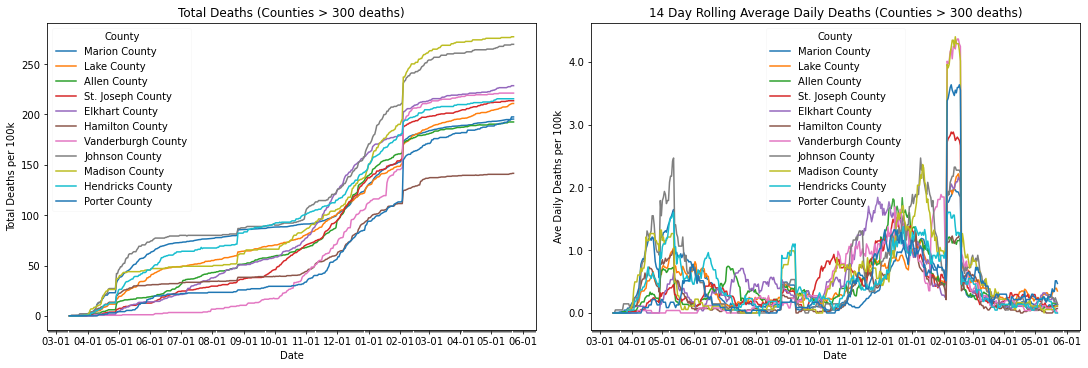

In [86]:
plotCountyDeathCurves(data, state, death_min = death_min, rolling_ave = 14, start_date='2020-03-14')

##### Section 4.12.3: County Level Mobility Reduction

###### Mobility Reduction by County - Showing daily fluctuations

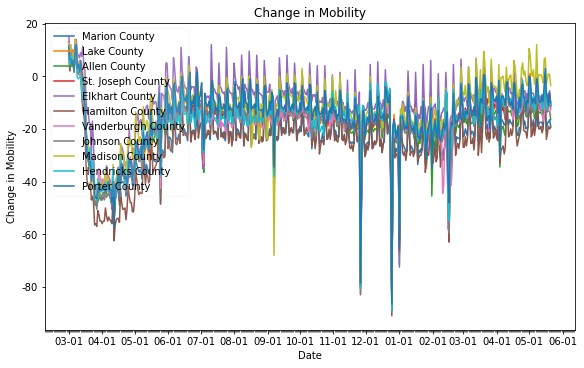

In [87]:
graphMobilityCounty(data, state, '2020-03-01', 1, death_min = death_min)

###### Mobility Reduction by County - 14 Day Average

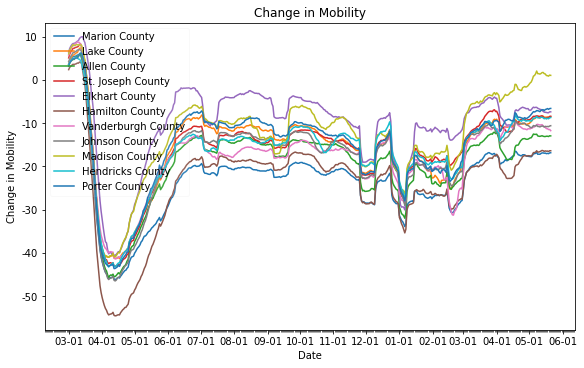

In [88]:
graphMobilityCounty(data, state, '2020-03-01', 14, death_min = death_min)